This is a tutorial of introduction, utilizing the [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/experience), includes their web interface and the python package, for simulating and implementing quantum circuits.

Resources:
1. The composer: [IBM Q Experience Composer](https://quantumexperience.ng.bluemix.net/qx/editor)
2. The python package: [Qiskit Terra](https://qiskit.org/terra)
3. Basic architecture of quantum gates: [IBM Q tutorial of basic gates](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/004-Quantum_Algorithms/061-Basic_Circuit_Identities_and_Larger_Circuits.html)
4. The Qiskit tutorial: [Qiskit tutorial](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/basics/getting_started_with_qiskit_terra.ipynb)
5. Trouble shooting for Qiskit: [Qiskit Document](https://qiskit.org/documentation/install.html)


# 1. Preparation

In this section, I will demonstrate how to get access to IBM Q System and to install of python package, qiskit-terra.



## 1.1 Sign-up for IBM Q Experience
The IBM Q Experience requires an email account or social media account to register. 

Instruction:
1. Open the link [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/experience)
2. Click "Sign in" to the top right corner.
3. Click "Sign up" in the dialogue box or link your social account to use their service.

Once logged in, we should be able to access the composer from:

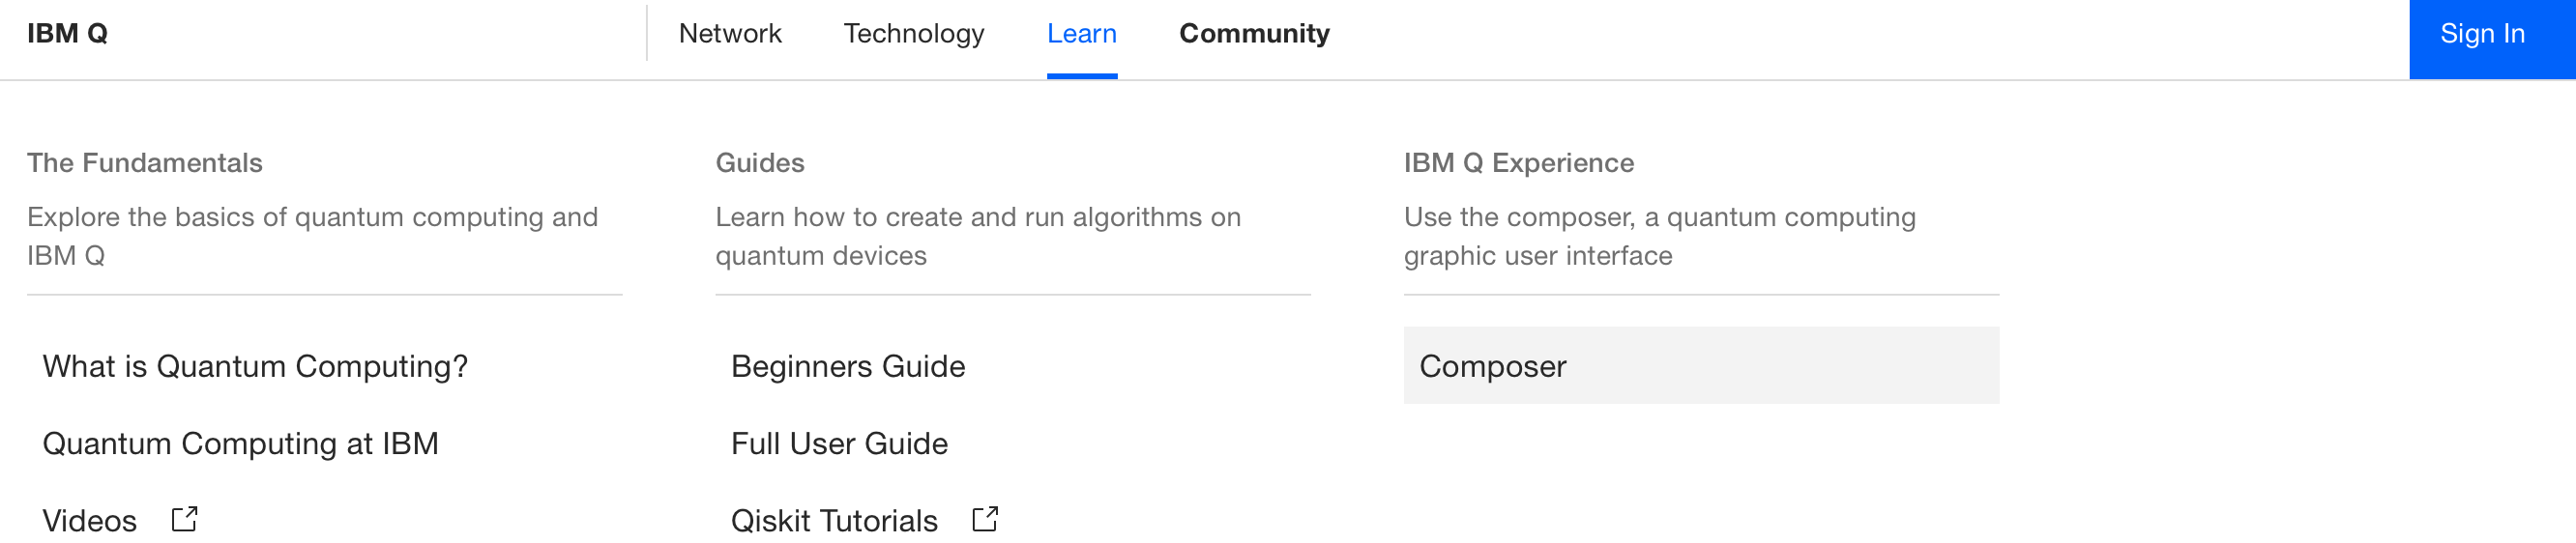

In [1]:
from IPython.display import Image
Image("Composer_position.png")

## 1.2 Account management
From the top right corner, we are able to access our account information. Your can update your info under the tab "Account". Under the tab "Advanced", we can see the available hardwares and the **API token** that we will use for qiskit. 

## 1.3 Installation of Qiskit-Terra
There is an instruction on their website: [Qiskit Terra](https://qiskit.org/terra). It requires Python version >= 3.5, and "**pip install qiskit**" for most linux/unix users. 

For windows user, I recommand [Anaconda](https://www.anaconda.com) to manage python versions and packages. Once installed, you can open "Anaconda Prompt" to launch a terminal-like window to install qiskit.



# 2. Web interface
The composer is to drag-and-drop quantum gates to build a quantum circuit. Since the architecture of the quantum chips, some of operation is forbidden between certains qubits. The composer interface a good starting place for building a quantum circuit.

To start, create a new experienment and specify the quantum chip you want to use. On the top of the composer, the information of the working backend and credit regulation is shown. Try to simulate first and save your credits to execute interesing circuit.

It also offers a "QASM" editor if you click "Switch to Qasm editor". You then will be able to import/download your circuit or even to build one. QASM is a basic C++ interface and doesn't include some other built-in functions or quantum gates.


# 3. Working with Qiskit-Terra
You may noticed from the account information page, that using qiskit can access to 16-qubit quantum chips and also to simulate and visualize your circuit. Their website has a straight-forware [Qiskit tutorial](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/basics/getting_started_with_qiskit_terra.ipynb). From the Qiskit program, we don't need to take care of the connection problem (for now). The connection of tquantum hardware varies and it will be taken care of by the qiskit.

## 3.1 Examples of quantum algorithms
### 3.1.1 Quantum half-adder
The quantum half-adder is a working algorithm and fun to start. The circuit is

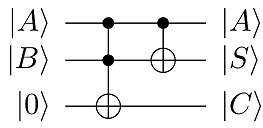

In [23]:
Image('quantum_half_adder.png')

### 3.1.2 Grover's search algorithm
The Grover's search algorithm is difficult to build on the web interface. The circuit is then:

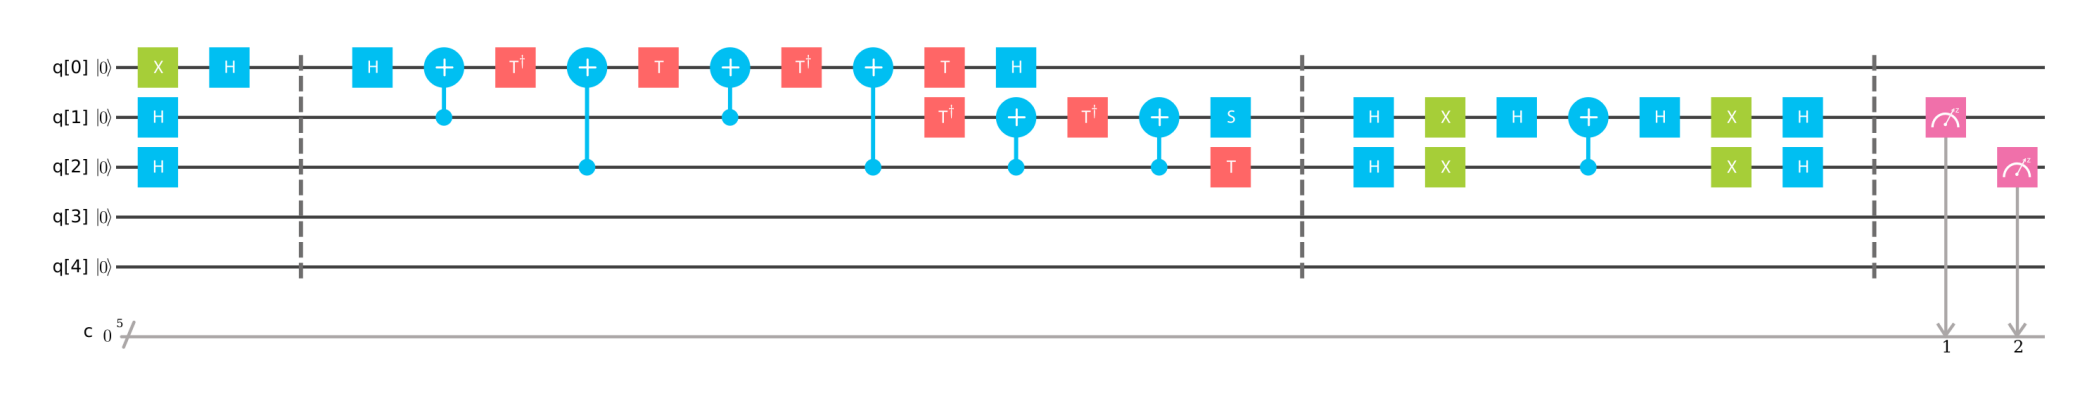

In [16]:
Image('grover_circuit.png')

Remember, the second subroutine is the oracle, which is a Toffoli gate to search number 3.

## 3.2 Programming
From the tutorial, it is straight forward to build a fundation to simulate/execute a quantum circuit. We can later substitute the core algorithm part for further implementations.

In [2]:
"""
Quantum circuit for quantum half-adder / Grover's algorithm
Tutorial:
https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/basics/getting_started_with_qiskit_terra.ipynb
# Date updated: Dec 1, 2018
"""
import sys
import os
import math
pi = math.pi


In [3]:
# useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [10]:
# Simulation parameters
num_qubit = 5
num_config = 2**num_qubit # The dimension of the Hilbert space

# Creat a quantum register called "qr" with " num_qubit" qubits
qr = QuantumRegister(num_qubit,'qr')

# Create a Quantum Circuit called "qc". involving the Quantum Register "qr"
qc = QuantumCircuit(qr)

In [6]:
## Quantum half-adder
##### Initial state
qc.x(qr[0])  # qr[0] represent the first input bit set to 1
qc.x(qr[1])  # same as qr[0], after the quantum algorithm, it is then the sum
# qr[2] is the carry bit.

##### Start of the quantum circuit #####
qc.ccx(qr[0],qr[1],qr[2])
qc.cx(qr[0],qr[1])
    


In [11]:
## Grover search
##### Initial state
qc.x(qr[0])
qc.h(qr[0])
qc.h(qr[1])  # qr[1] and qr[2] are the output
qc.h(qr[2])
    
## Grover's operator
### The Oracle to find 3 in {0:3}
qc.ccx(qr[1],qr[2],qr[0])
    
### Flip
qc.h(qr[1])
qc.h(qr[2])
    
qc.x(qr[1])
qc.x(qr[2])
    
qc.h(qr[1])
qc.cx(qr[2],qr[1])
qc.h(qr[1])
        
qc.x(qr[1])
qc.x(qr[2])
            
qc.h(qr[1])
qc.h(qr[2])
    
qc.h(qr[0])
qc.x(qr[0])

### END of quantum algorithm

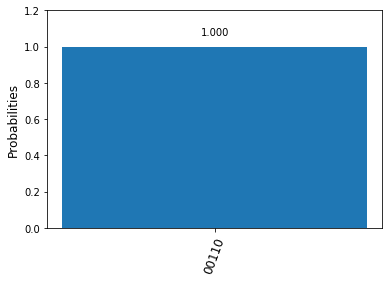

In [12]:
# Import Aer
from qiskit import Aer


cr = ClassicalRegister(5, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(qr, cr)
meas.barrier(qr)
# map the quantum measurement to the classical bits
meas.measure(qr,cr)

# The Qiskit circuit object supports composition using
# the addition operator.
whole = qc+meas


backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(whole, backend_sim, shots=8000)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(whole)
print(counts) # The result of simulation
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [24]:
## Save or Load account information
from qiskit import IBMQ
# IBMQ.save_account('YOURTOKEN')
# IBMQ.enable_account('YOURTOKEN', url='https://quantumexperience.ng.bluemix.net/api')
# IBMQ.load_accounts()

print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [18]:
## To chose the working backend

from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
# backend = least_busy(large_enough_devices)
# backend = IBMQ.get_backend('ibmq_qasm_simulator')  ## Simulator

backend = IBMQ.get_backend('ibmq_16_melbourne')
backend = IBMQ.get_backend('ibmqx4')


print("The best backend is " + backend.name())


The best backend is ibmqx4


In [19]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3       # Maximum number of credits to spend on executions. 


job_exp = execute(whole, backend=backend, shots=shots, max_credits=max_credits)

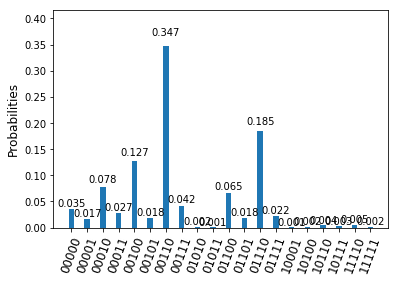

In [20]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(whole)
plot_histogram(counts_exp)

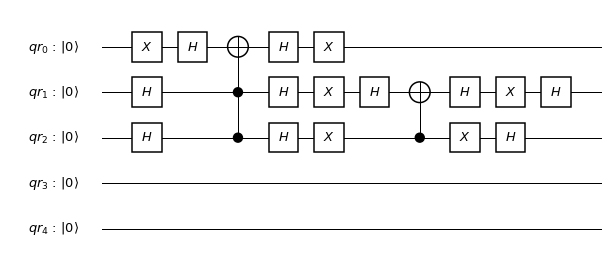

In [22]:
## Visualize the circuit
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc)

> Try to play with the circuit to realise 0+1 and search number 2 in the database {0:3}

> Does the naming of the qubits effect the implementation results? How different are the result using qiskit and using web interface?

> Optimizing the circuit? For example, HXH=Z, which means we can reduce the number of quantum gates. 

## 4. Open questions
Up to now, the IBM Q team is continuing developing this package to tackle more complex problems like [Qiskit-Aqua](https://qiskit.org/aqua). However, with only the basic  of qiskit, we are able to design, to simulate and to implement quantum algorithms. The poor performace of the implementation of quantum algorithm still needs deep understandings of errors and optimizations of circuits.

